In [1]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

from pipeline.python.classifications import bootstrap_fit_tuning_curves as osi
from pipeline.python.classifications import experiment_classes as ecs
from pipeline.python.utils import natural_keys, label_figure

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/test_responsivity.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    

In [2]:
%matplotlib notebook

# TEST GRATINGS:

In [3]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC084' #'JC059'
session = '20190522' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'


In [18]:
# renames = glob.glob(os.path.join(rootdir, 'JC*', '20*', '*zoom2p0x*', '*gratings*', 
#                                  'traces', 'traces001*', 'tuning', 'fit-dff_responsive-ROC-thr0.05_boot-100-resample-60',
#                                 '*bootstrap_params.json'))
# print(len(renames))

# for r in renames:
#     basedir = os.path.split(r)[0]
#     with open(r, 'r') as f:
#         params = json.load(f)
#     if params['directory'] != basedir:
#         params['directory'] = basedir
#         with open(r, 'w') as f:
#             json.dump(params, f, indent=4,)
        

20


# Create Experiment Obj

In [20]:
reload(ecs)
reload(osi)

<module 'pipeline.python.classifications.bootstrap_fit_tuning_curves' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/bootstrap_fit_tuning_curves.pyc'>

In [21]:

exp = ecs.Gratings(animalid, session, fov, traceid=traceid, rootdir=rootdir)
exp.print_info()

... [JC084|20190522|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
************* Experiment Object info *************
Name: combined_gratings_static
Experiment type: gratings
Animalid: JC084
Session: 20190522
FOV: FOV1_zoom2p0x
roi-id, trace-id: rois001, traces001
('Data source:', '/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/data_arrays/datasets.npz')
No data loaded yet.
**************************************************


In [22]:
# Get responsivity stats:
responsive_test = 'ROC'
responsive_thr = 0.05

# Tuning params
n_bootstrap_iters = 100
n_resamples = 60
n_intervals_interp = 3

In [23]:
create_new = False

goodness_thr = 0.66

In [24]:
fitdf, fitparams, fitdata = exp.get_tuning(response_type=response_type, responsive_test=responsive_test,
                                          n_bootstrap_iters=n_bootstrap_iters, n_resamples=n_resamples,
                                          n_intervals_interp=n_intervals_interp, create_new=create_new)

...getting OSI results: fit-dff_responsive-ROC-thr0.05_boot-100-resample-60
Loading existing fits.


In [25]:
fitparams

{u'directory': u'/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/tuning/fit-dff_responsive-ROC-thr0.05_boot-100-resample-60',
 u'interp_values': [0.0,
  15.0,
  30.0,
  45.0,
  60.0,
  75.0,
  90.0,
  105.0,
  120.0,
  135.0,
  150.0,
  165.0,
  180.0,
  195.0,
  210.0,
  225.0,
  240.0,
  255.0,
  270.0,
  285.0,
  300.0,
  315.0,
  330.0,
  345.0,
  360.0],
 u'n_bootstrap_iters': 100,
 u'n_intervals_interp': 3,
 u'response_type': u'dff',
 u'roi_list': [1,
  3,
  4,
  5,
  6,
  7,
  9,
  10,
  11,
  12,
  14,
  16,
  17,
  18,
  19,
  21,
  25,
  26,
  27,
  29,
  30,
  33,
  35,
  40,
  42,
  44,
  45,
  46,
  49,
  51,
  52,
  54,
  55,
  56,
  57,
  59,
  61,
  63,
  65,
  67,
  68,
  69,
  70,
  73,
  74,
  75,
  78,
  79,
  81,
  88,
  91,
  92,
  93,
  97,
  98,
  101,
  102,
  106,
  108,
  112,
  114,
  119,
  120,
  121,
  122,
  123,
  125,
  132,
  135,
  137,
  138,
  139,
 

In [26]:
fitdf, goodfits = exp.evaluate_fits(fitdf, fitparams, fitdata, goodness_thr=goodness_thr)

Loading existing evaluation results
44 out of 119 fit cells pass goodness-thr 0.66


In [73]:
fitdf['preferred_theta'] = fitdf['preferred_theta'] % 360.

In [29]:
roi_list, nrois_total = exp.get_responsive_cells(responsive_test=responsive_test, responsive_thr=responsive_thr)
print(len(roi_list))

... getting responsive cells (test: ROC, thr: 0.05')
124


In [30]:
estats = exp.get_stats(responsive_test=responsive_test, responsive_thr=responsive_thr)

... [combined_gratings_static] Loading roi stats and cell list...
... loading data array


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:964: RuntimeWarning: invalid value encountered in divide
  traces = raw_traces


... offset: 644.22
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: ROC
... getting responsive cells (test: ROC, thr: 0.05')


In [32]:
estats.nrois == nrois_total

True

In [33]:
#roi_list = estats.rois
print("Found %i responsive cells (%s, thr=%.2f)" % (len(roi_list), responsive_test, responsive_thr))

Found 124 responsive cells (ROC, thr=0.05)


# Set output summary stats dir

In [35]:
summarydir = glob.glob(os.path.join(rootdir, exp.animalid, exp.session, exp.fov, exp.name,
                           'traces', '%s*' % exp.traceid, 'summary_stats', responsive_test))[0]

print(summarydir)

/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/summary_stats/ROC


In [36]:
data_identifier = '|'.join([exp.animalid, exp.session, exp.fov, exp.traceid, responsive_test])


In [50]:
estats.gdf.groups.keys()

[1,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 14,
 16,
 17,
 18,
 19,
 21,
 25,
 26,
 27,
 29,
 30,
 33,
 35,
 40,
 42,
 44,
 45,
 46,
 49,
 51,
 52,
 54,
 55,
 56,
 57,
 59,
 61,
 63,
 65,
 67,
 68,
 69,
 70,
 73,
 74,
 75,
 78,
 79,
 81,
 88,
 91,
 92,
 93,
 97,
 98,
 101,
 102,
 106,
 108,
 112,
 114,
 119,
 120,
 121,
 122,
 123,
 125,
 132,
 135,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 147,
 148,
 150,
 151,
 152,
 153,
 155,
 156,
 160,
 163,
 165,
 166,
 168,
 170,
 171,
 175,
 176,
 177,
 179,
 182,
 183,
 188,
 189,
 193,
 203,
 205,
 206,
 210,
 212,
 214,
 215,
 216,
 217,
 221,
 224,
 231,
 232,
 233,
 234,
 241,
 242,
 243,
 246,
 247,
 250,
 252,
 255,
 258]

## Look at distN of responses

In [51]:
def hist_roi_stat(gdf, metric='dff', roi_list=None, ax=None):
    if roi_list is None:
        roi_list = estats.gdf.groups.keys()
    if ax is None:
        fig, ax = pl.subplots()

    max_dffs_by_config = [gdf.get_group(roi).groupby(['config']).mean()['dff'].max() for roi in roi_list]
    sns.distplot(max_dffs_by_config, ax=ax)
    sns.despine(ax=ax, trim=True, offset=2)
    ax.set_xlabel(metric)
    ax.set_ylabel('kde')
    return ax

<IPython.core.display.Javascript object>


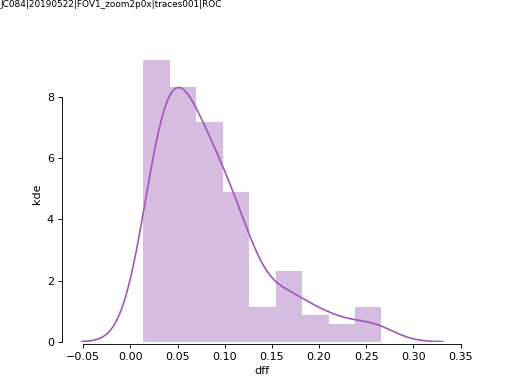

In [56]:
fig, ax = pl.subplots()
ax = hist_roi_stat(estats.gdf, metric='dff', roi_list=roi_list, ax=ax)

label_figure(fig, data_identifier)
pl.savefig(os.path.join(summarydir, 'hist-avg-dff-best-cfg.png'))


# Load tuning fits

In [55]:
# response_type = 'dff'
# n_bootstrap_iters = 100
# n_intervals_interp=3
# goodness_thr = 0.66
# make_plots = True
# create_new=False

In [84]:

# fitdf, fitparams, fitdata = exp.fit_tuning(response_type=response_type, make_plots=make_plots, plot_metrics=False,
#                                            n_bootstrap_iters=n_bootstrap_iters, n_intervals_interp=n_intervals_interp, 
#                                            responsive_test=responsive_test, responsive_thr=responsive_thr, 
#                                            create_new=create_new)


#### Test fit quality with goodness-of-fit metric

In [85]:
# goodness_thr = 0.66
# fitdf, gfits = osi.check_fit_quality(fitdf, fitdata)
# goodfits = osi.threshold_fitness_quality(gfits, goodness_thr=goodness_thr, plot_hist=False)


In [86]:
allfits = fitdf['cell'].unique()

# Set output dir to tuning dir

In [57]:
tuningdir = fitparams['directory']
print tuningdir

/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/tuning/fit-dff_responsive-ROC-thr0.05_boot-100-resample-60


# Visualize tuning characteristics of well-fit neurons

In [58]:

fit_desc = os.path.split(fitparams['directory'])[-1]
data_identifier = '|'.join([exp.animalid, exp.session, exp.fov, exp.traceid, fit_desc])


In [59]:
df = fitdf[fitdf['cell'].isin(goodfits)]


In [90]:
df.head()

,ASI,DSI,cell,preferred_theta,r2,r2comb,gof
0,0.259138,0.259103,5,338.974623,0.829313,0.78026,0.667976
1,0.253034,0.249846,5,-14.330042,0.860500,0.78026,0.667976
2,0.253813,0.206032,5,-14.415947,0.849347,0.78026,0.667976
3,0.311965,0.319596,5,-10.979674,0.943969,0.78026,0.667976
4,0.253818,0.267305,5,342.399557,0.827628,0.78026,0.667976


In [91]:
len(df['cell'].unique())

44

#### Sort by DSI

In [70]:
def even_vs_odd_iters_sortby(fitdf, sort_by='DSI', roi_list=None, descending=True):
    if roi_list is not None:
        df = fitdf[fitdf['cell'].isin(roi_list)]
    else:
        df = fitdf.copy()
    
    if 'theta' in sort_by:
        dsi_values = df.groupby(['cell'])['preferred_theta'].apply(spstats.circmean)
    elif 'rad' in sort_by:
        dsi_values = df.groupby(['cell'])['preferred_theta'].apply(spstats.circmean)
    else:
        dsi_values = df.groupby(['cell']).mean()[sort_by]
    if descending:
        dsi_sorted_ixs = np.argsort(dsi_values).values[::-1] #Sort from biggest to smallest
    else:
        dsi_sorted_ixs = np.argsort(dsi_values).values #Sort from smallest to biggest
    rsort_by_dsi = np.array(dsi_values.index.tolist())[dsi_sorted_ixs]

    evens = []
    odds= []
    for roi in rsort_by_dsi:
        responses = fitdata['original_data'][roi]['responses']
        evens.append(responses[0::2].mean().values)
        odds.append(responses[1::2].mean().values)

    evens = np.array(evens)
    odds = np.array(odds)


    cmap = 'inferno'
    fig, axes = pl.subplots(1,2, sharex=True, sharey=True)
    cbar_ax = fig.add_axes([.85, .3, .03, .4])
    vmin = min([evens.min(), odds.min()])
    vmax = max([evens.max(), odds.max()])

    sns.heatmap(evens, ax=axes[0], cbar=True, vmin=vmin, vmax=vmax, cbar_ax=cbar_ax, cmap=cmap)
    axes[0].set_title('evens')
    axes[0].set_xticklabels(fitparams['tested_values'], rotation=45)
    axes[0].tick_params(labelsize=8)
    axes[0].set_ylabel('cell')

    sns.heatmap(odds, ax=axes[1], cbar=0, vmin=vmin, vmax=vmax, cbar_ax=None, cmap=cmap)
    axes[1].set_title('odds')
    axes[1].set_xticklabels(fitparams['tested_values'], rotation=45)
    axes[1].tick_params(labelsize=8)

    pl.subplots_adjust(wspace=0.05, right=0.80)

    fig.suptitle('sort by %s' % sort_by)

    return fig

<IPython.core.display.Javascript object>


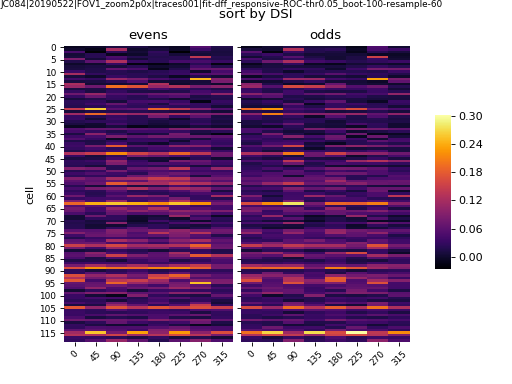

all-fit_tuning-on-evens-vs-odd-iters_sort-by-DSI


In [71]:
filter_gof = False
if filter_gof:
    roi_list = copy.copy(goodfits)
    filter_str = 'gof%.2f' % goodness_thr
else:
    roi_list = None
    filter_str = 'all-fit'
    
fig = even_vs_odd_iters_sortby(fitdf, sort_by='DSI', roi_list=roi_list, descending=True)
label_figure(fig, data_identifier)

figname = '%s_tuning-on-evens-vs-odd-iters_sort-by-DSI' % filter_str
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))
print figname

#### Sort by preferred theta

<IPython.core.display.Javascript object>


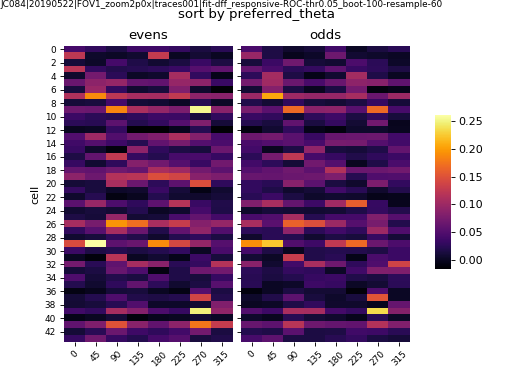

'gof0.66_tuning-on-evens-vs-odd-iters_sort-by-preferredtheta'

In [75]:
filter_gof = True
if filter_gof:
    roi_list = copy.copy(goodfits)
    filter_str = 'gof%.2f' % goodness_thr
else:
    roi_list = None
    filter_str = 'all-fit'
    
fig = even_vs_odd_iters_sortby(fitdf, sort_by='preferred_theta', roi_list=roi_list, descending=False)
label_figure(fig, data_identifier)


figname= '%s_tuning-on-evens-vs-odd-iters_sort-by-preferredtheta' % filter_str
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))
figname

# Combine bootstrap iters and get profile of each cell

In [95]:
fitdf.head()

,ASI,DSI,cell,preferred_theta,r2,r2comb,gof
0,0.113478,0.241001,1,112.815766,0.816551,0.596873,0.515525
1,0.164272,0.118872,1,112.198196,0.687734,0.596873,0.515525
2,0.154520,0.130066,1,91.933135,0.710843,0.596873,0.515525
3,0.124664,0.158865,1,103.162950,0.815078,0.596873,0.515525
4,0.140017,0.129466,1,112.218305,0.916464,0.596873,0.515525


In [96]:
filter_good = False

In [97]:
if filter_good:
    roi_list = copy.copy(goodfits)
    filter_str = 'good-fits-%.2f' % goodness_thr
else:
    roi_list = copy.copy(allfits)
    filter_str = 'all-fits'



,ASI,DSI,gof,r2_comb,r_null,r_offset,r_pref,sigma,theta_pref
1,0.139821,0.148313,0.515525,0.596873,0.024139,-0.011653,0.033378,58.189125,106.967776
5,0.238047,0.239732,0.667976,0.780260,0.007484,0.013430,0.028899,32.777538,341.510634
7,0.120311,0.121794,0.647583,0.753529,0.024739,-0.007150,0.033837,55.454318,88.076047
9,0.228383,0.035577,0.738153,0.875168,0.033583,0.019594,0.036970,25.547037,86.912078
10,0.072446,0.138486,0.124104,0.134878,0.018910,-0.010689,0.032146,78.173020,121.491937


In [77]:
def aggregate_fit_results(fitdata, fitdf):
    tuningdata = []

    for roi, fitd in fitdf.groupby(['cell']):
        popt = osi.get_average_params_over_iters(fitdata['results_by_iter'][roi])    
        r_pref, r_null, theta_pref, sigma, r_offset = popt
        asi = fitd['ASI'].mean()
        dsi = fitd['DSI'].mean()
        r2comb = fitd['r2comb'].unique()[0]
        gof = fitd['gof'].unique()[0]
        tuningdata.append( pd.DataFrame({'ASI': asi,
                                         'DSI': dsi,
                                          'r_pref': r_pref,
                                          'r_null': r_null,
                                          'theta_pref': theta_pref,
                                          'sigma': sigma,
                                          'r_offset': r_offset,
                                        'r2_comb': r2comb,
                                        'gof': gof
                                        }, index=[roi]) )

    tuning = pd.concat(tuningdata, axis=0)
    tuning['theta_pref'] = tuning['theta_pref'] % 360.

    return tuning

In [78]:
tuning = aggregate_fit_results(fitdata, fitdf)

In [79]:
tuning.head()

,ASI,DSI,gof,r2_comb,r_null,r_offset,r_pref,sigma,theta_pref
1,0.139821,0.148313,0.515525,0.596873,0.024139,-0.011653,0.033378,58.189125,106.967776
5,0.238047,0.239732,0.667976,0.780260,0.007484,0.013430,0.028899,32.777538,341.510634
7,0.120311,0.121794,0.647583,0.753529,0.024739,-0.007150,0.033837,55.454318,88.076047
9,0.228383,0.035577,0.738153,0.875168,0.033583,0.019594,0.036970,25.547037,86.912078
10,0.072446,0.138486,0.124104,0.134878,0.018910,-0.010689,0.032146,78.173020,121.491937


'gof0.66'

#### Look at distN of each metric

<IPython.core.display.Javascript object>


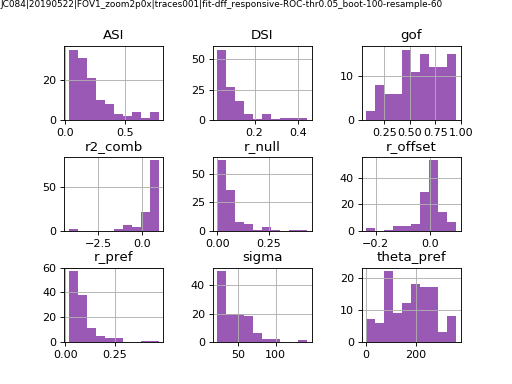

hist-each-param_all-cells


In [84]:
filter_gof = False
if filter_gof:
    filter_str = 'gof%.2f' % goodness_thr
    df = tuning[tuning['gof'] >= goodness_thr]
else:
    filter_str = 'all-cells'
    df = tuning.copy()

fig = tuning.hist()
pl.subplots_adjust(hspace=0.5, wspace=0.5)

label_figure(fig[0][0].figure, data_identifier)

figname = 'hist-each-param_%s' % filter_str
print(figname)
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))

#### Compare metrics pair-wise

In [ ]:
from pandas.plotting import scatter_matrix


<IPython.core.display.Javascript object>


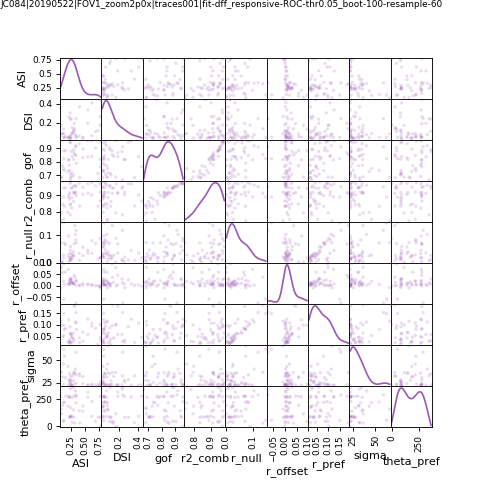

scatter-matrix_gof0.66


In [86]:
filter_gof = True
if filter_gof:
    filter_str = 'gof%.2f' % goodness_thr
    df = tuning[tuning['gof'] >= goodness_thr]
else:
    filter_str = 'all-cells'
    df = tuning.copy()

fig = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

label_figure(fig[0][0].figure, data_identifier)
figname = 'scatter-matrix_%s' % filter_str
print(figname)
pl.savefig(os.path.join(tuningdir, 'evaluation', '%s.png' % figname))

### Find closest matching tested theta to plot histogram of preferred angles

In [87]:
from collections import Counter
from matplotlib import patches

def hist_gratings_stats(tuningdf, all_categories, colorvals, variable='pref_theta', ax=None,
                        thresh=0.33, ori_metric='ASI', show_selective=False):
        
    best_ori_vals = tuningdf[variable]
    best_ori_vals_selective = tuningdf[tuningdf[ori_metric] >= thresh][variable]
    
    ori_counts_all = Counter(best_ori_vals)
    if all_categories is not None:
        for catg in all_categories:
            if catg not in ori_counts_all:
                ori_counts_all[catg] = 0
                
    ori_counts_selective = Counter(best_ori_vals_selective)
    for ori in ori_counts_all.keys():
        if ori not in ori_counts_selective.keys():
            ori_counts_selective[ori] = 0
   
    bar_palette = colorvals.as_hex()
    
    if ax is None:
        fig, ax = pl.subplots()
    
    sns.barplot(sorted(ori_counts_all.keys()), [ori_counts_all[c] for c in sorted(ori_counts_all.keys())], palette=bar_palette, ax=ax)
    ax.tick_params(axis='x', which='both', length=0)

    if show_selective:    
        ax2 = ax.twinx()
        sns.barplot(sorted(ori_counts_all.keys()), [ori_counts_selective[c] for c in sorted(ori_counts_all.keys())], palette=bar_palette, ax=ax2)
        ax2.set_ylim(ax.get_ylim())
        hatch = '//' #itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
        for i, bar in enumerate(ax2.patches):
            bar.set_hatch(hatch)
        ax2.set_yticklabels([])
        ax2.tick_params(axis='both', which='both', length=0)
    
        hatch1 = patches.Patch( facecolor='white', hatch=r'\\\\',label='%s > %.2f' % (ori_metric, thresh))
        ax2.legend(handles = [hatch1], loc=1)
        
    sns.despine(trim=True, offset=4)
        
    return ax

In [88]:
tested_thetas = fitparams['tested_values']
tested_thetas.append(360)

tested_thetas = np.array(tested_thetas)

tuning['theta_tested'] = [tested_thetas[np.where(np.abs(t-tested_thetas) == np.min(np.abs(t-tested_thetas)))[0][0]] % 360 for t in tuning['theta_pref']]
tested_thetas = tested_thetas[0:-1]

In [89]:
tuning.head()

,ASI,DSI,gof,r2_comb,r_null,r_offset,r_pref,sigma,theta_pref,theta_tested
1,0.139821,0.148313,0.515525,0.596873,0.024139,-0.011653,0.033378,58.189125,106.967776,90
5,0.238047,0.239732,0.667976,0.780260,0.007484,0.013430,0.028899,32.777538,341.510634,0
7,0.120311,0.121794,0.647583,0.753529,0.024739,-0.007150,0.033837,55.454318,88.076047,90
9,0.228383,0.035577,0.738153,0.875168,0.033583,0.019594,0.036970,25.547037,86.912078,90
10,0.072446,0.138486,0.124104,0.134878,0.018910,-0.010689,0.032146,78.173020,121.491937,135


<IPython.core.display.Javascript object>


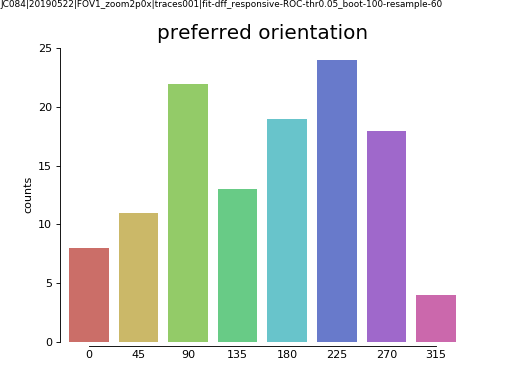

hist-tested-oris_all-cells


In [94]:
filter_gof = False
if filter_gof:
    filter_str = 'gof%.2f' % goodness_thr
    df = tuning[tuning['gof'] >= goodness_thr]
else:
    filter_str = 'all-cells'
    df = tuning.copy()


cmap = 'hls'
noris = len(tested_thetas)

fig, ax = pl.subplots()
colorvals = sns.color_palette(cmap, noris) # len(gratings_sconfigs))
#show_selective = False if filter_gof else True
if tested_thetas.shape[0] > 0:
    hist_gratings_stats(tuning, tested_thetas, colorvals, ax=ax, variable='theta_tested',
                       thresh=goodness_thr, ori_metric='gof', show_selective=filter_gof)
ax.set_title('preferred orientation', fontsize=18)
ax.set_ylabel('counts')
        
    
    
label_figure(fig, data_identifier)
figname = 'hist-tested-oris_%s' % filter_str
print(figname)
pl.savefig(os.path.join(tuningdir, '%s.png' % figname))


In [104]:
tuningdir

u'/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/tuning/bootstrap-fit-remove-bas_responsive-ROC-thr0.05'